# DTSA 5511: Ecommerce Text Classification

In [33]:
#Importing Libraries & Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [34]:
#Loading Dataframe & Data Cleaning
df = pd.read_csv('/Users/jschlangen/Desktop/ecommerceDataset.csv', names=['class', 'text'])
df = df.dropna()

df.head()

,class,text
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


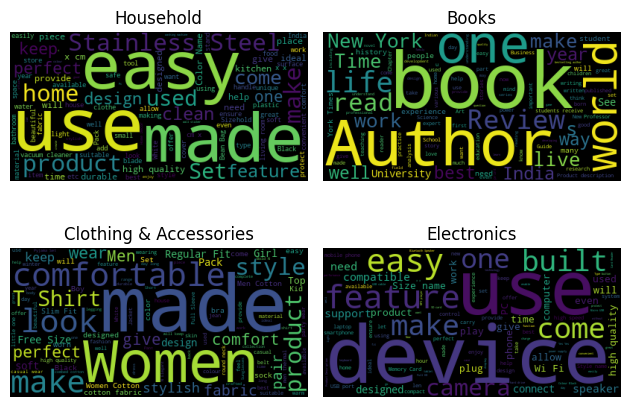

In [35]:
#Generating Word Cloud by Ecommerce Category
categories = df['class'].unique()

for i, cat in enumerate(categories):
    plt.subplot(2, 2, i + 1)
    string = " ".join(s for s in df[df['class'] == cat]['text'])
    
    wordcloud = WordCloud(max_words=100).generate(string)
    
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(cat)

plt.tight_layout()
plt.show()

In [36]:
#More Data Cleaning, Split Train & Test Data
class_map = LabelEncoder()
df['class'] = class_map.fit_transform(df['class'])

train_df, test_df = train_test_split(df, test_size=0.2)

In [3]:
#Processing Ecommerce Text with Tokenizer
max_words = 9999
max_length = 99

token = Tokenizer(num_words=max_words)
token.fit_on_texts(train_df['text'])
train_sequences = token.texts_to_sequences(train_df['text'])
x_train = pad_sequences(train_sequences, maxlen=max_length)
y_train = to_categorical(train_df['class'])

test_sequences = token.texts_to_sequences(test_df['text'])
x_test = pad_sequences(test_sequences, maxlen=max_length)

In [4]:
#Building Classification Model with Keras Sequential
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
#Training Model & Generating Predictions
fit_hist = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_df['class'].values

Epoch 1/5
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 35s 33ms/step - accuracy: 0.7816 - loss: 0.5613 - val_accuracy: 0.9637 - val_loss: 0.1346
Epoch 2/5
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 34s 33ms/step - accuracy: 0.9762 - loss: 0.0937 - val_accuracy: 0.9659 - val_loss: 0.1238
Epoch 3/5
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 33s 33ms/step - accuracy: 0.9871 - loss: 0.0473 - val_accuracy: 0.9712 - val_loss: 0.1163
Epoch 4/5
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 37s 37ms/step - accuracy: 0.9912 - loss: 0.0341 - val_accuracy: 0.9710 - val_loss: 0.1156
Epoch 5/5
1009/1009 ━━━━━━━━━━━━━━━━━━━━ 34s 34ms/step - accuracy: 0.9951 - loss: 0.0187 - val_accuracy: 0.9701 - val_loss: 0.1232
316/316 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


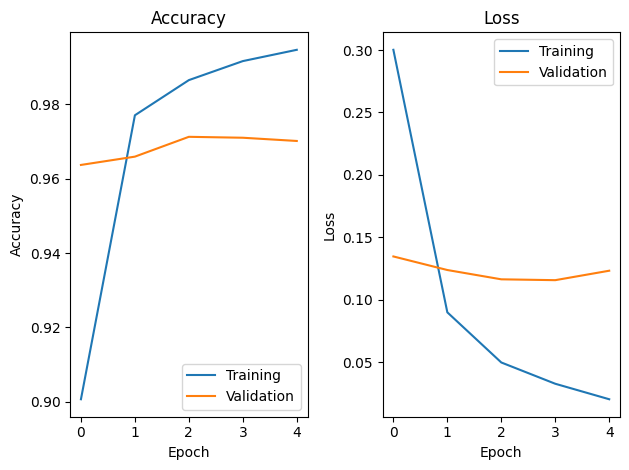

In [49]:
#Plotting Accuracy & Loss Data
plt.subplot(1, 2, 1)
plt.plot(fit_hist.history['accuracy'], label='Training')
plt.plot(fit_hist.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(fit_hist.history['loss'], label='Training')
plt.plot(fit_hist.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

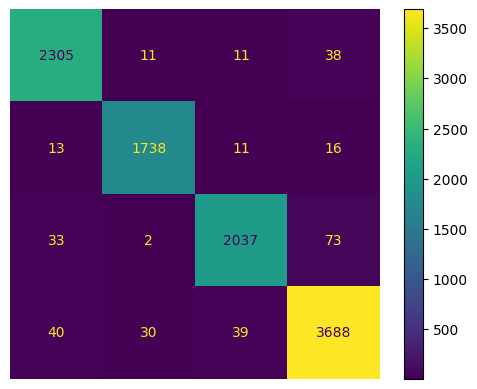

In [50]:
#Create & Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_map.classes_)
cm.plot()
plt.axis('off')
plt.show()